In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [4]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [5]:
missing_percentage = df.isnull().mean() * 100

In [6]:
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage

Age        3.494445
Height    22.193821
Weight    23.191180
Medal     85.326207
dtype: float64

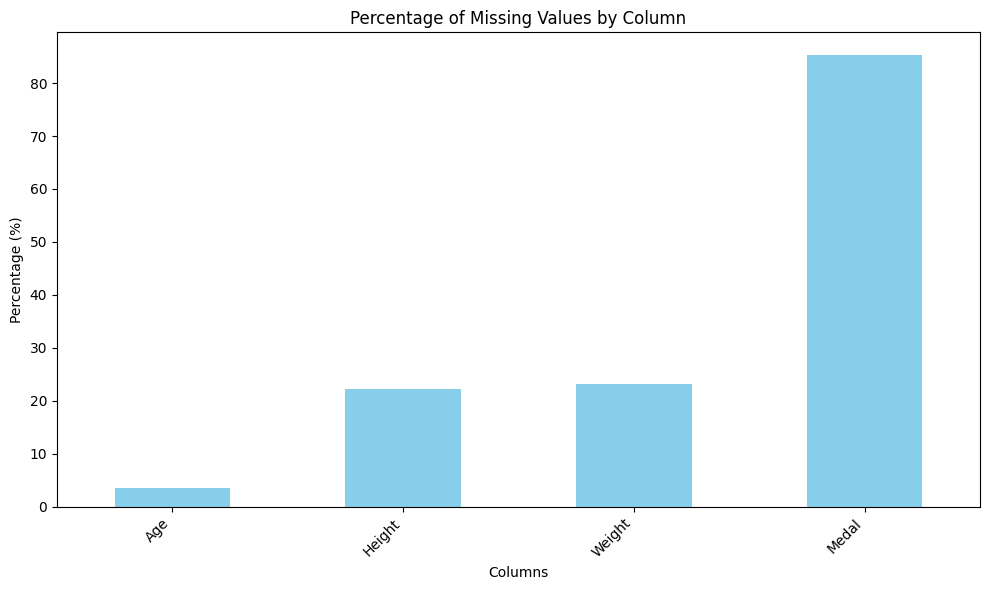

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

In [11]:
df['Medal'].fillna('No Medal', inplace=True)


In [12]:
df['Weight'].fillna(df['Weight'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)


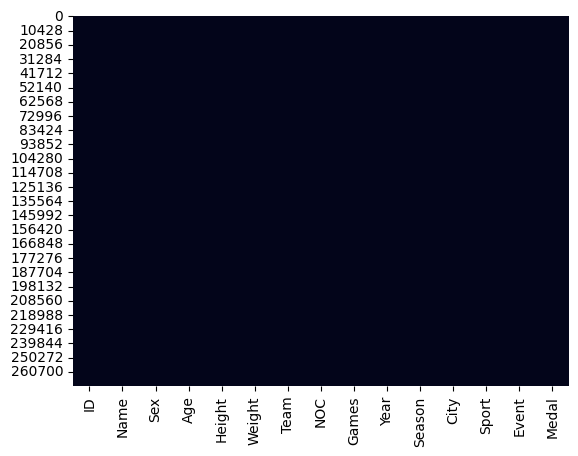

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False)
plt.show()


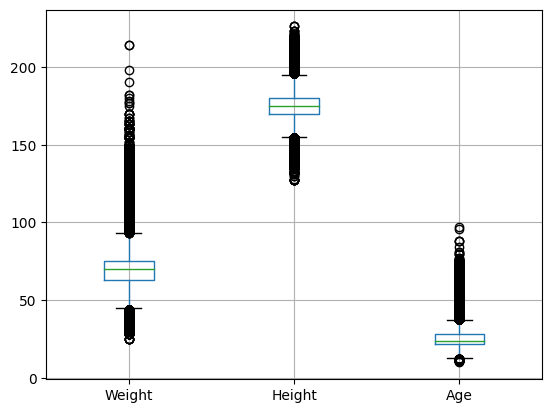

In [14]:
df[['Weight', 'Height', 'Age']].boxplot()
plt.show()


In [16]:
df.describe()
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [17]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [18]:
# Preview the dataset
print(df.head())

# Get a summary of the dataset
print(df.describe(include='all'))


   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0   175.0    70.0         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0   175.0    70.0  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event     Medal  
0       Basketball Men's Basketball  No Medal  
1      Judo Men's Extra-Lightweight  No Medal  
2           Fo

M    196594
F     74522
Name: Sex, dtype: int64
Athletics        38624
Gymnastics       26707
Swimming         23195
Shooting         11448
Cycling          10859
                 ...  
Racquets            12
Jeu De Paume        11
Roque                4
Basque Pelota        2
Aeronautics          1
Name: Sport, Length: 66, dtype: int64


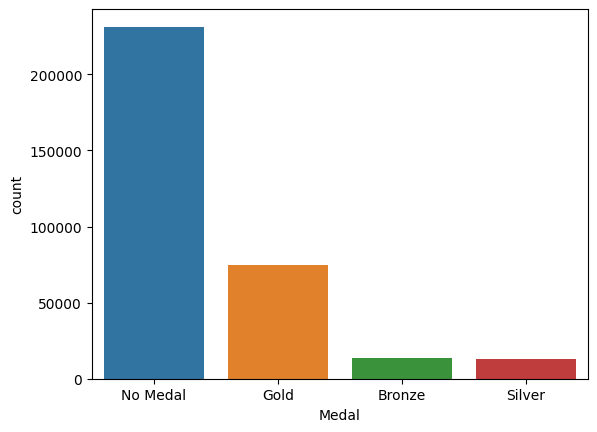

In [19]:
# Count unique values in categorical columns
print(df['Sex'].value_counts())
print(df['Sport'].value_counts())

# Plot the distribution of categorical variables
import seaborn as sns
sns.countplot(x='Sex', data=df)
sns.countplot(x='Medal', data=df)
plt.show()


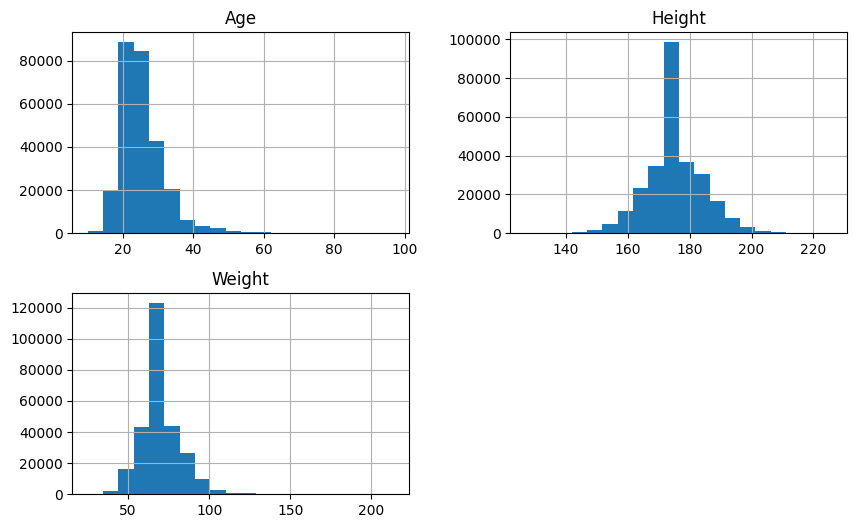

In [20]:
# Plot histograms for numerical columns
df[['Age', 'Height', 'Weight']].hist(bins=20, figsize=(10, 6))

# Box plots to check for outliers
sns.boxplot(x=df['Age'])
sns.boxplot(x=df['Height'])
plt.show()


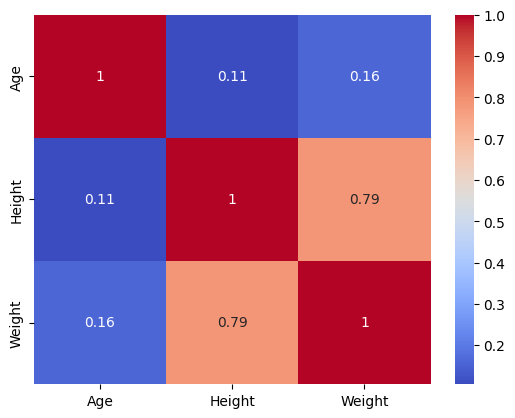

In [21]:
# Scatter plots
sns.scatterplot(x='Height', y='Weight', data=df)

# Correlation matrix and heatmap
corr_matrix = df[['Age', 'Height', 'Weight']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


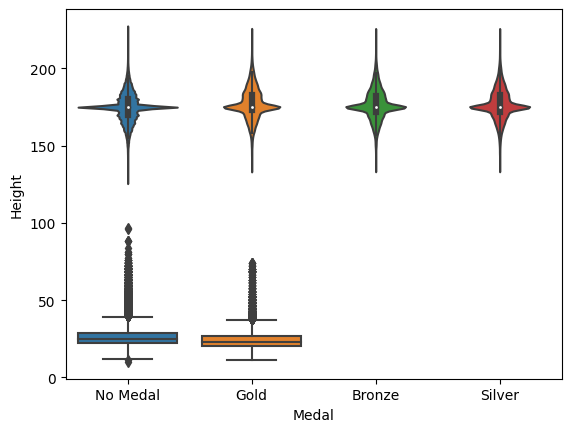

In [22]:
# Box plot of Age by Sex
sns.boxplot(x='Sex', y='Age', data=df)

# Violin plot of Height by Medal
sns.violinplot(x='Medal', y='Height', data=df)
plt.show()


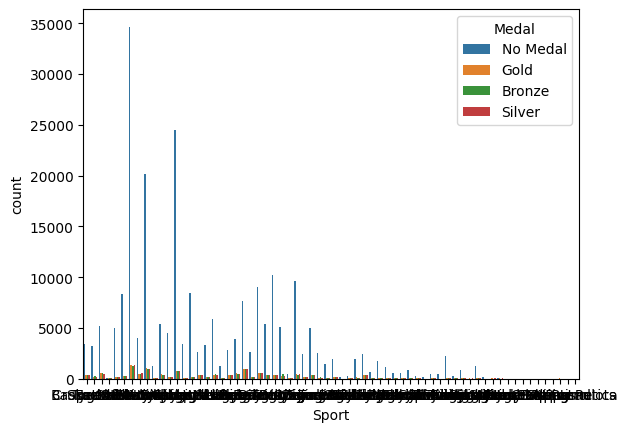

In [23]:
# Crosstab of Sex vs Medal
pd.crosstab(df['Sex'], df['Medal'])

# Grouped bar plot of Sport vs Medal
sns.countplot(x='Sport', hue='Medal', data=df)
plt.show()


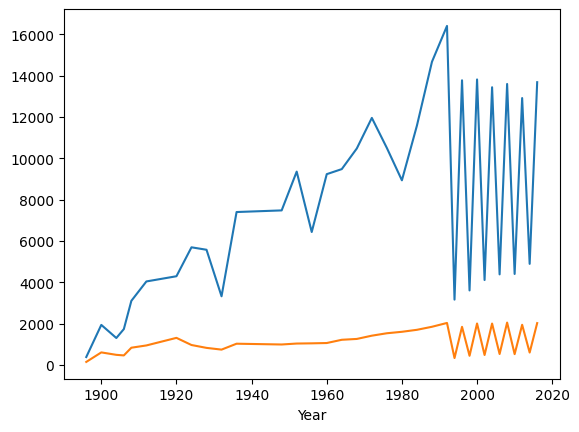

In [24]:
# Plot total athletes per year
df.groupby('Year').size().plot(kind='line')

# Plot medals over the years
df_medals = df[df['Medal'] != 'No Medal']
df_medals.groupby('Year').size().plot(kind='line')
plt.show()


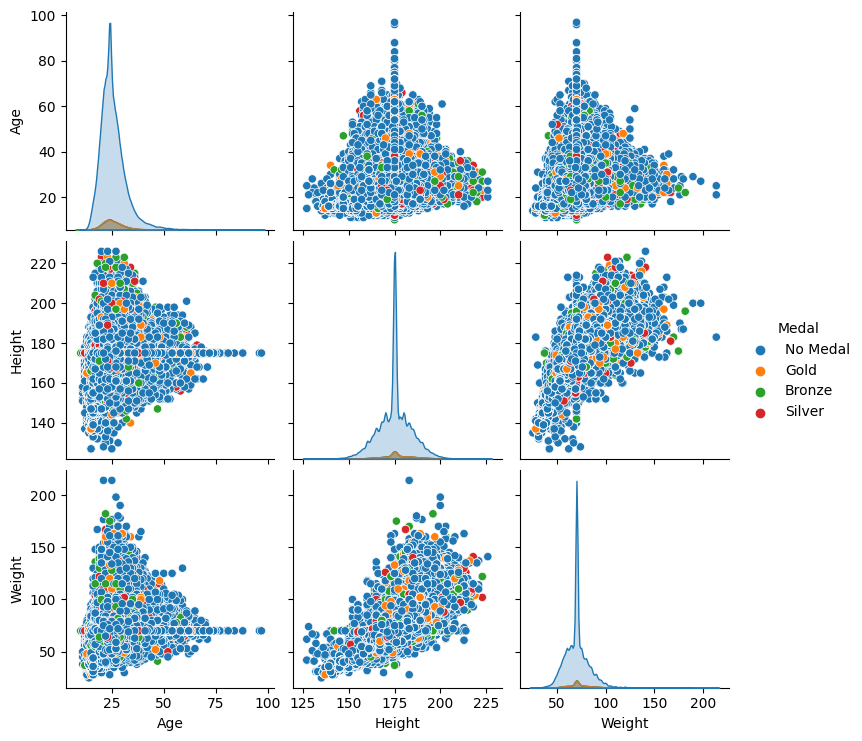

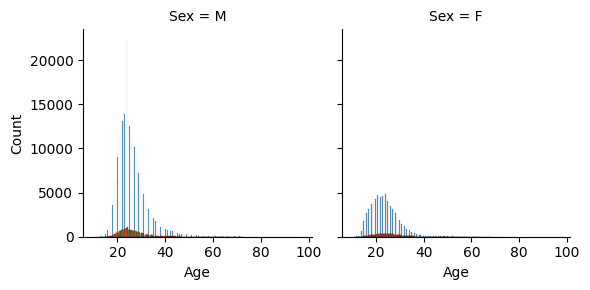

In [25]:
# Pair plot for Age, Height, Weight, and Medal
sns.pairplot(df[['Age', 'Height', 'Weight', 'Medal']], hue='Medal')

# Facet grid of Age and Medal by Sex
g = sns.FacetGrid(df, col='Sex', hue='Medal')
g.map(sns.histplot, 'Age')
plt.show()


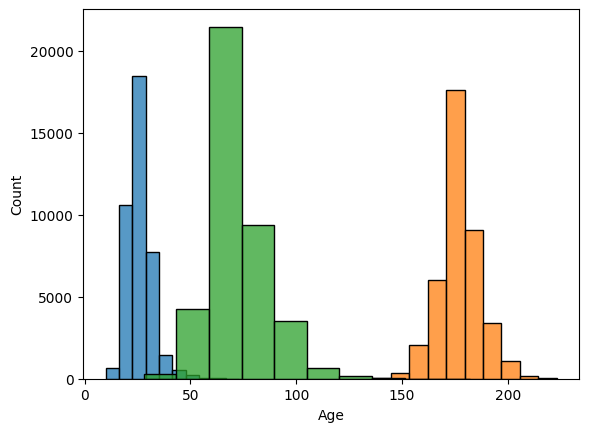

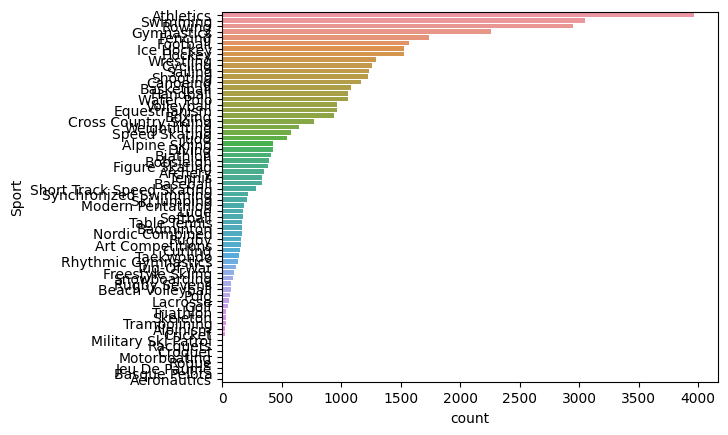

In [26]:
# Filter the data for medal winners only
df_medals = df[df['Medal'] != 'No Medal']

# Analyze distribution of Age, Height, and Weight for medal winners
sns.histplot(df_medals['Age'], bins=10)
sns.histplot(df_medals['Height'], bins=10)
sns.histplot(df_medals['Weight'], bins=10)
plt.show()

# Analyze the distribution of medal winners by sport
sns.countplot(y='Sport', data=df_medals, order=df_medals['Sport'].value_counts().index)
plt.show()


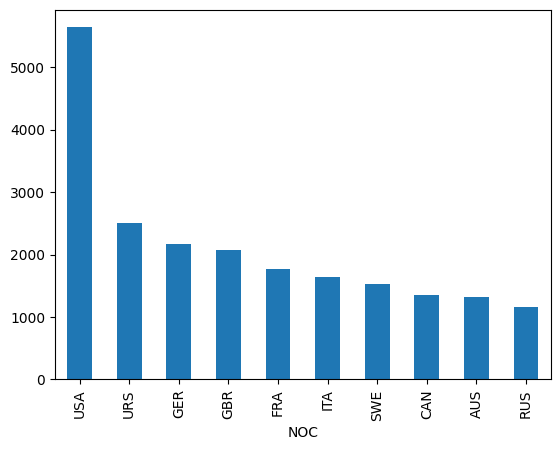

In [27]:
# Medals by country
df_medals.groupby('NOC')['Medal'].size().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_11840\122401987.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Year')['Age', 'Height', 'Weight'].mean().plot(subplots=True, layout=(3,1), figsize=(10,12))


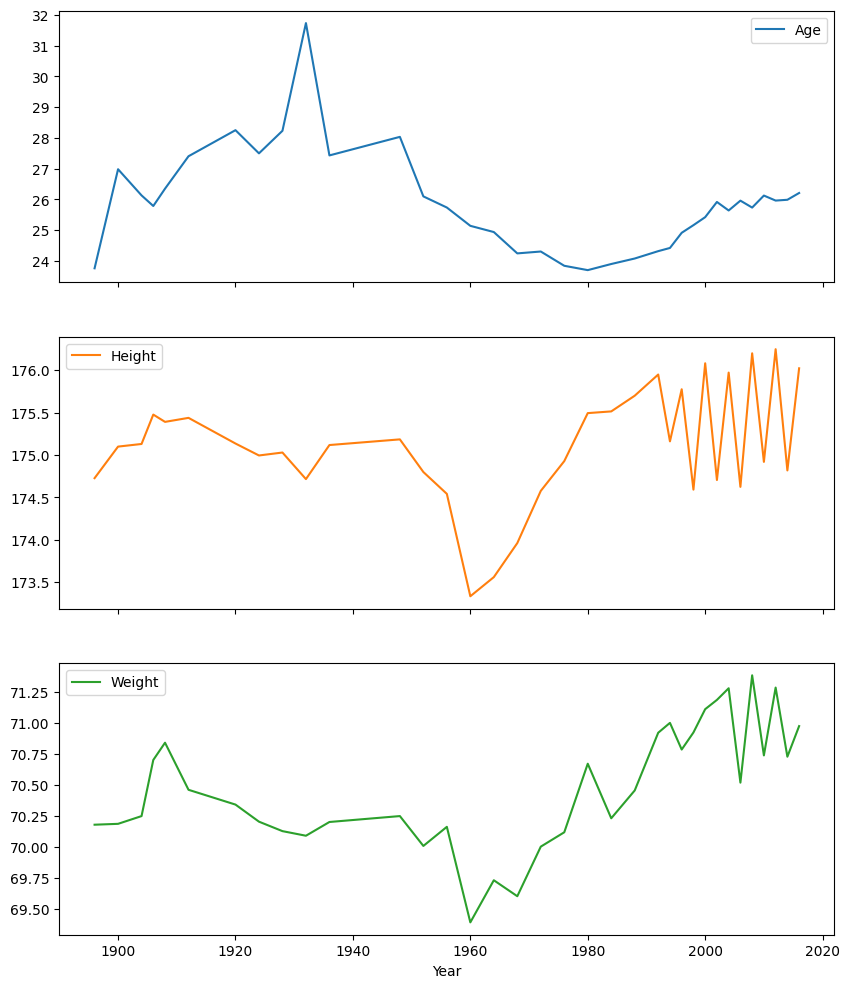

In [28]:
# Plot average age, height, weight over time
df.groupby('Year')['Age', 'Height', 'Weight'].mean().plot(subplots=True, layout=(3,1), figsize=(10,12))
plt.show()


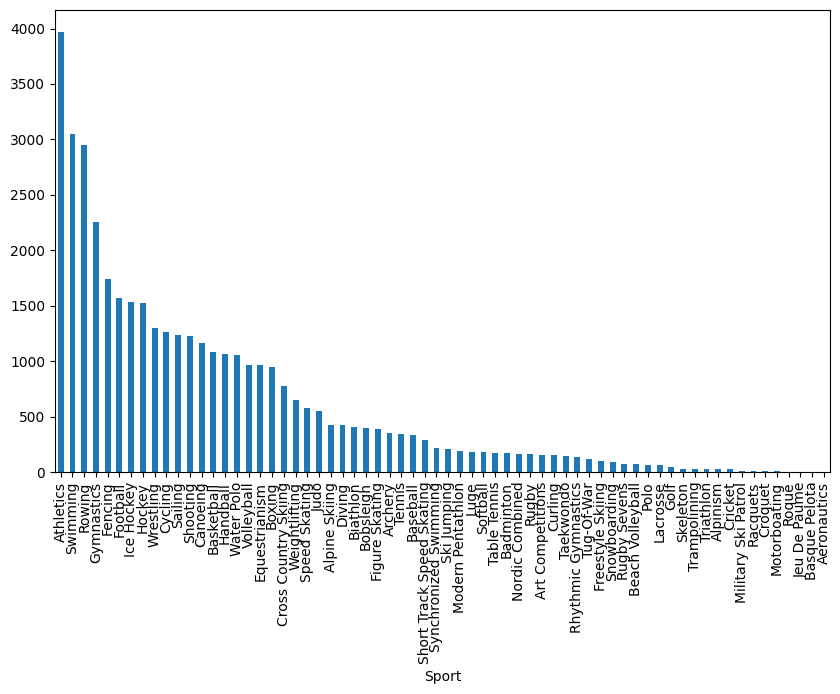

In [29]:
# Analyze medals per sport
df_medals.groupby('Sport')['Medal'].size().sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.show()


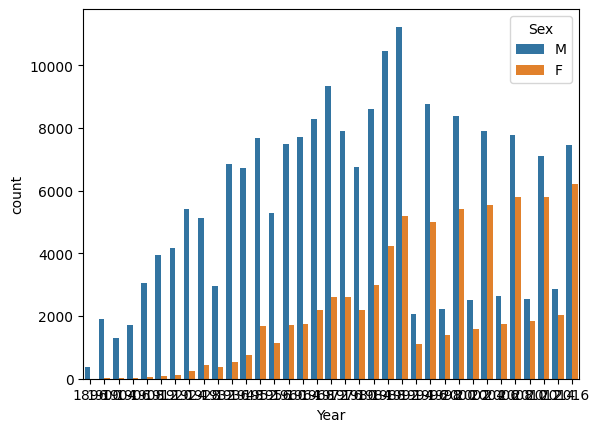

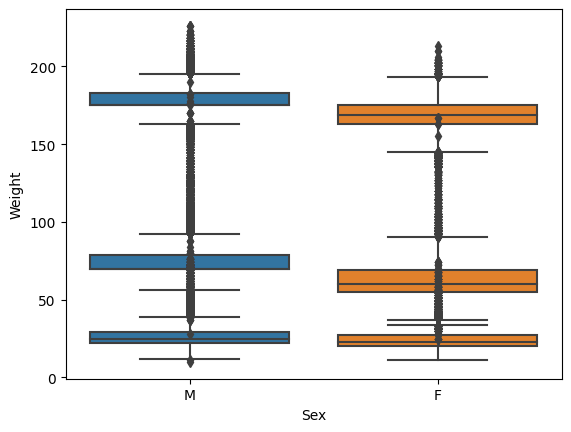

In [30]:
# Participation trend over time by gender
sns.countplot(x='Year', hue='Sex', data=df)
plt.show()

# Compare male vs female athletes' Age, Height, Weight
sns.boxplot(x='Sex', y='Age', data=df)
sns.boxplot(x='Sex', y='Height', data=df)
sns.boxplot(x='Sex', y='Weight', data=df)
plt.show()


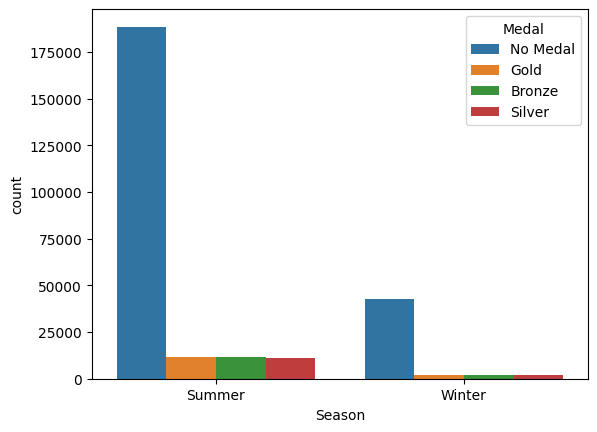

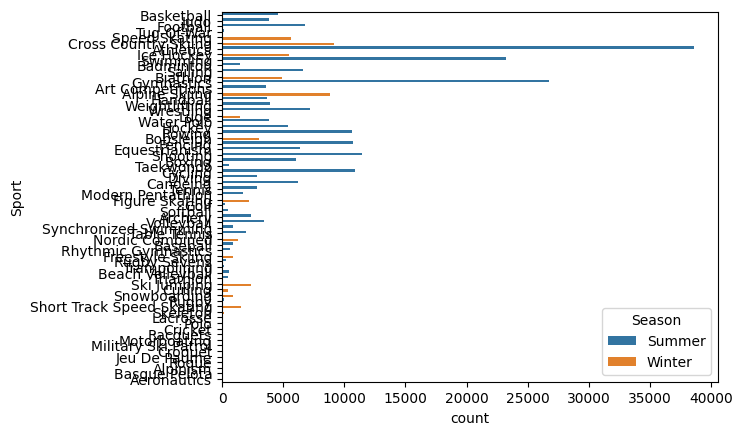

In [31]:
# Analyze medal distribution across seasons
sns.countplot(x='Season', hue='Medal', data=df)
plt.show()

# Compare sport popularity in Summer vs Winter
sns.countplot(y='Sport', hue='Season', data=df)
plt.show()


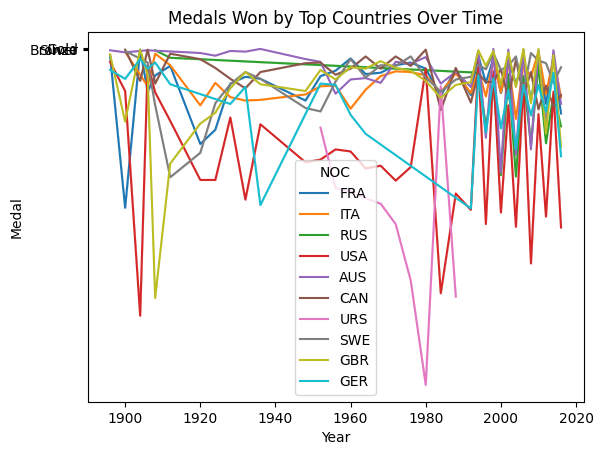

In [34]:
# Analyze medals won by top countries across time
top_countries = df_medals['NOC'].value_counts().head(10).index
df_top_countries = df_medals[df_medals['NOC'].isin(top_countries)]

# Use estimator='size' to count the number of medals per year
sns.lineplot(x='Year', y='Medal', hue='NOC', data=df_top_countries, estimator='size')
plt.title('Medals Won by Top Countries Over Time')
plt.show()


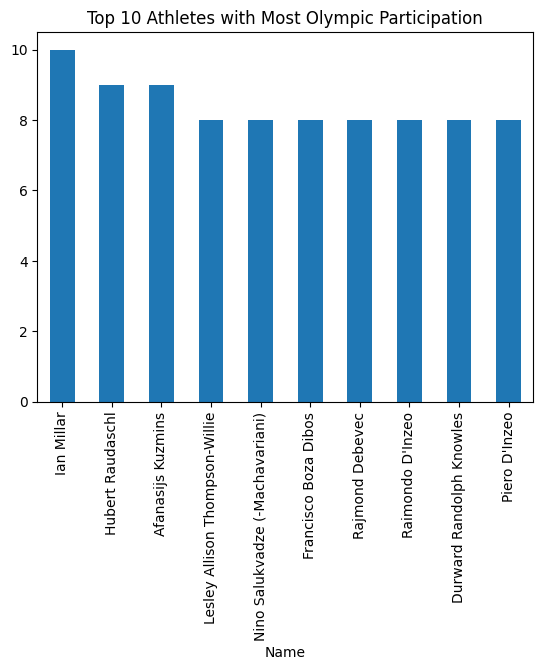

In [35]:
# Analyze the number of unique years each athlete participated
athlete_longevity = df.groupby('Name')['Year'].nunique().sort_values(ascending=False)
athlete_longevity.head(10).plot(kind='bar', title='Top 10 Athletes with Most Olympic Participation')
plt.show()


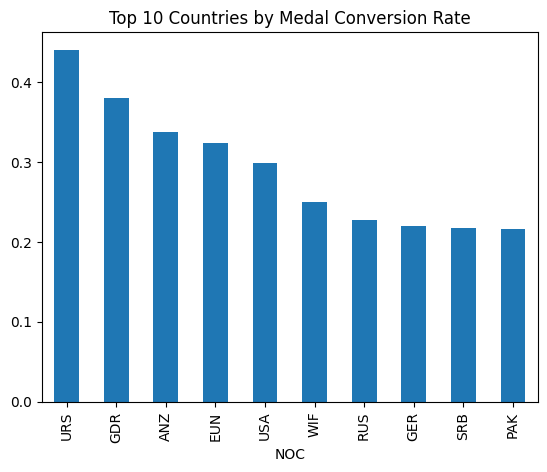

In [36]:
# Calculate medal conversion rate by country
country_participation = df.groupby('NOC').size()
country_medals = df_medals.groupby('NOC').size()
medal_conversion_rate = (country_medals / country_participation).sort_values(ascending=False).head(10)
medal_conversion_rate.plot(kind='bar', title='Top 10 Countries by Medal Conversion Rate')
plt.show()


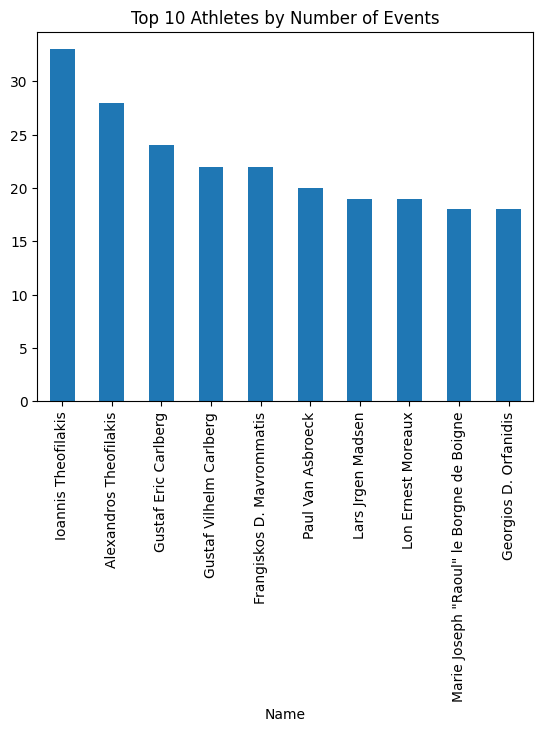

In [37]:
# Analyze how many events each athlete participated in
athlete_event_specialization = df.groupby('Name')['Event'].nunique().sort_values(ascending=False)
athlete_event_specialization.head(10).plot(kind='bar', title='Top 10 Athletes by Number of Events')
plt.show()


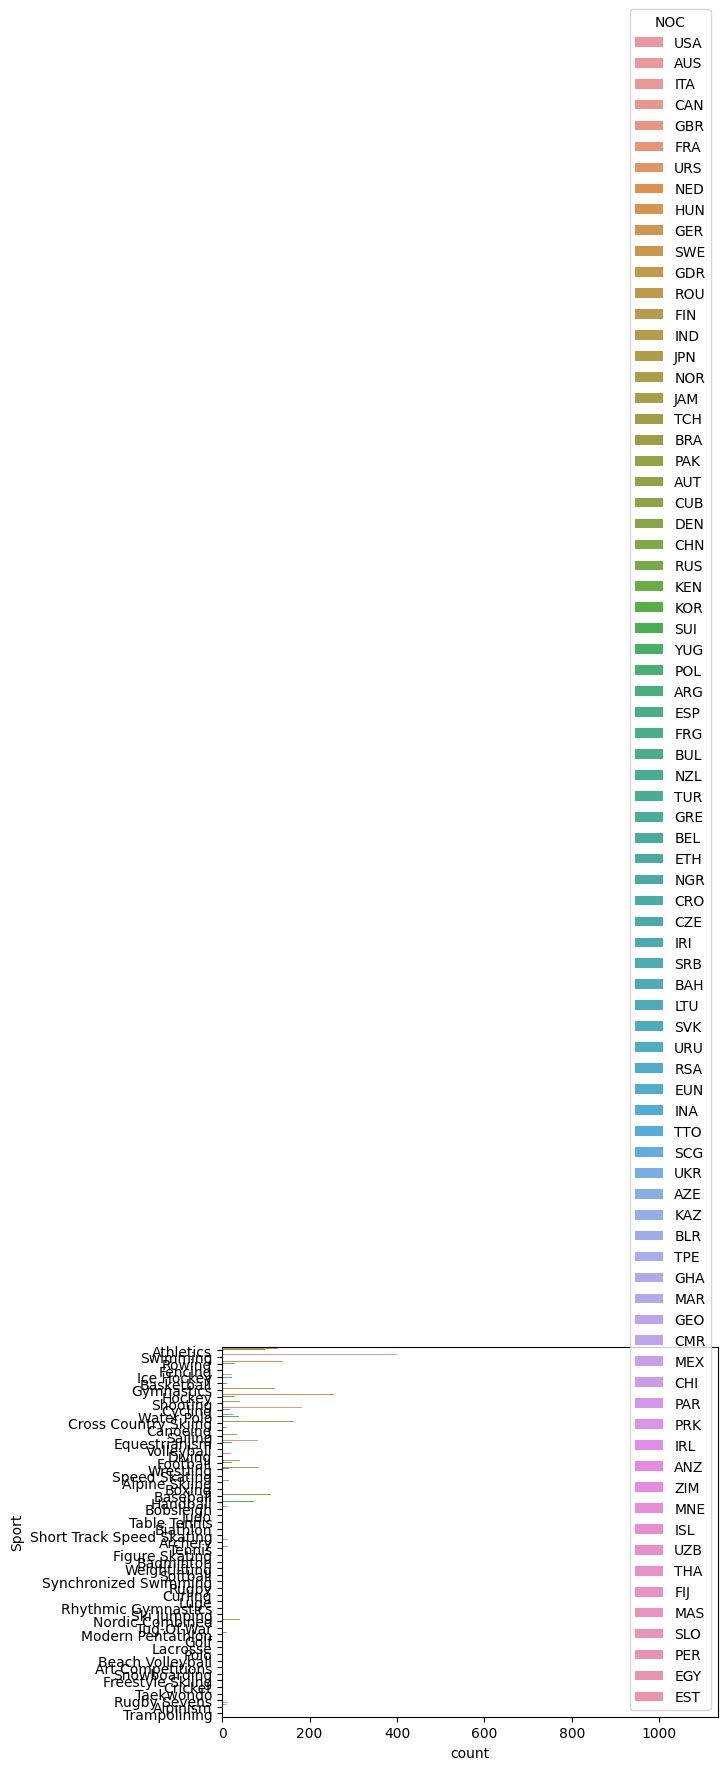

In [38]:
# Sports dominated by a single country
df_sport_country = df_medals.groupby(['Sport', 'NOC']).size().reset_index(name='count')
top_sport_country = df_sport_country[df_sport_country['count'] > 10].sort_values(by='count', ascending=False)
sns.barplot(x='count', y='Sport', hue='NOC', data=top_sport_country)
plt.show()


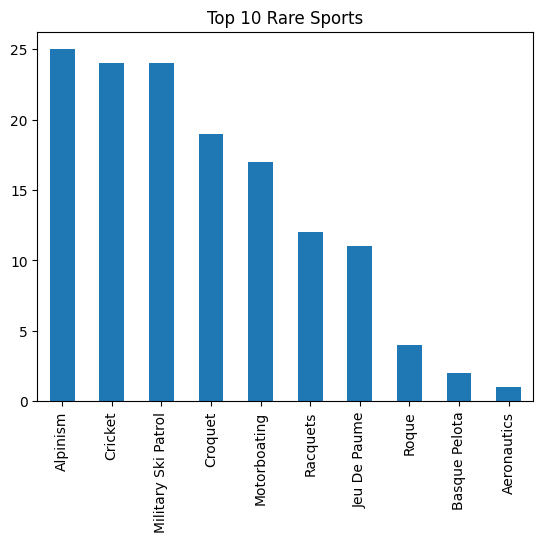

In [39]:
# Identify rare sports
rare_sports = df['Sport'].value_counts().tail(10)
rare_sports.plot(kind='bar', title='Top 10 Rare Sports')
plt.show()


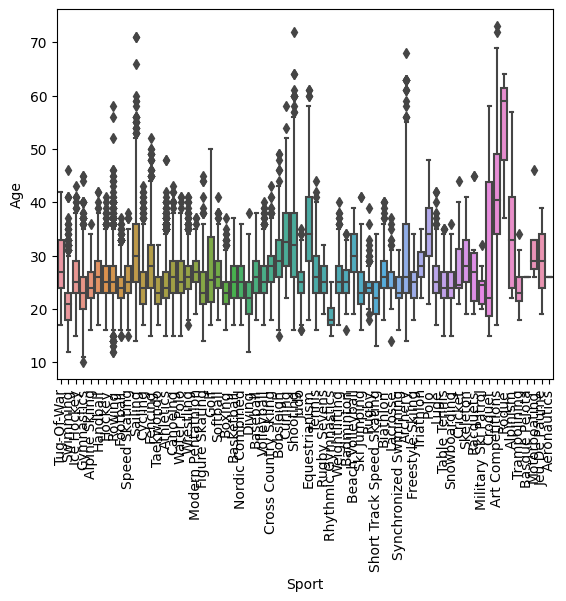

In [40]:
# Analyze winning age by sport
sns.boxplot(x='Sport', y='Age', data=df_medals)
plt.xticks(rotation=90)
plt.show()


C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


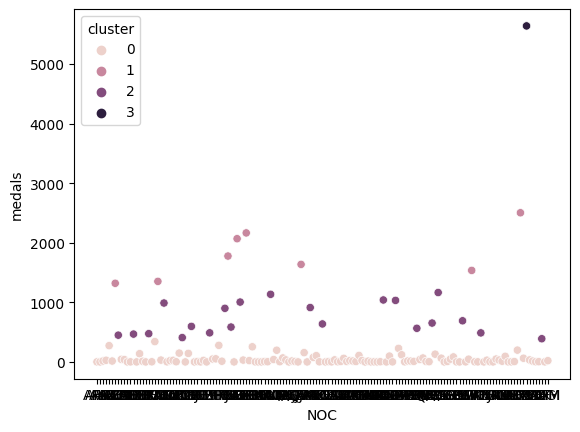

In [41]:
from sklearn.cluster import KMeans
# Prepare data for clustering
country_data = df_medals.groupby('NOC').size().reset_index(name='medals')
kmeans = KMeans(n_clusters=4)
country_data['cluster'] = kmeans.fit_predict(country_data[['medals']])

sns.scatterplot(x='NOC', y='medals', hue='cluster', data=country_data)
plt.show()


In [42]:
df['Career Duration'] = df.groupby('Name')['Year'].transform(lambda x: x.max() - x.min())
df[['Name', 'Career Duration']].drop_duplicates().sort_values(by='Career Duration', ascending=False).head(10)


,Name,Career Duration
198559,James Reid,104
171703,Alexandros Nikolopoulos,96
53218,Dimitrios Deligiannis,96
122196,Martin Koch,94
31121,John Buchanan,92
167523,Jzsef Nagy,88
19432,Josef Bernek,86
167492,Bla Nagy,86
62725,Mohamed El-Sayed,84
83725,Nikola Grbi,84
